In [3]:
import pandas as pd
df = pd.read_csv('fr-en-evaluations_nationales_2degt_academie.csv', sep=';', encoding='utf-8', low_memory=False)
df.head()


,num_ligne,Année,Code académie,Nom académie,Discipline,IPS moyen,Caractéristique,Score moyen,Ecart type,groupe 1,groupe 2,groupe 3,groupe 4,groupe 5,groupe 6
0,5,2019,1.0,PARIS,Mathématiques,129.4,Fille,274.5,53.5,5.8,10.3,16.8,20.2,18.0,28.9
1,7,2019,2.0,AIX-MARSEILLE,Français,113.6,Ensemble,258.9,47.4,9.6,12.8,20.7,21.2,16.5,19.3
2,8,2019,2.0,AIX-MARSEILLE,Français,113.6,Fille,263.7,47.4,8.1,11.6,19.8,20.8,17.2,22.5
3,10,2019,2.0,AIX-MARSEILLE,Mathématiques,113.6,Ensemble,258.1,46.8,8.0,14.9,22.7,21.8,15.5,17.2
4,16,2019,3.0,BESANCON,Mathématiques,113.1,Ensemble,269.3,43.8,3.0,10.4,21.8,24.3,18.7,21.9


In [ ]:
#récupérer les lignes avec la valeur ensemble dans un nouveau dashboard, 
#regarder l'écart type le plus haut, le moint haut (?)
# faire un histogramme par dep(?)

In [3]:
df.columns


Index(['num_ligne', 'Année', 'Code académie', 'Nom académie', 'Discipline',
       'IPS moyen', 'Caractéristique', 'Score moyen', 'Ecart type', 'groupe 1',
       'groupe 2', 'groupe 3', 'groupe 4', 'groupe 5', 'groupe 6'],
      dtype='object')

In [5]:
df.shape

(1116, 15)

In [7]:
colonnes = (['Année', 'Code académie', 'Nom académie', 'Discipline',
       'IPS moyen', 'Caractéristique', 'Score moyen', 'Ecart type'])
nouveau_df = df[colonnes].copy()
nouveau_df.head

<bound method NDFrame.head of       Année  Code académie   Nom académie     Discipline  IPS moyen  \
0      2019            1.0          PARIS  Mathématiques      129.4   
1      2019            2.0  AIX-MARSEILLE       Français      113.6   
2      2019            2.0  AIX-MARSEILLE       Français      113.6   
3      2019            2.0  AIX-MARSEILLE  Mathématiques      113.6   
4      2019            3.0       BESANCON  Mathématiques      113.1   
...     ...            ...            ...            ...        ...   
1111   2024           33.0         GUYANE       Français       93.2   
1112   2024           33.0         GUYANE  Mathématiques       93.2   
1113   2024           33.0         GUYANE  Mathématiques       93.2   
1114   2024           43.0        MAYOTTE       Français       74.4   
1115   2024           70.0      NORMANDIE       Français      114.7   

     Caractéristique  Score moyen  Ecart type  
0              Fille        274.5        53.5  
1           Ensemble 

In [21]:
filtre = (nouveau_df["Discipline"] == "Mathématiques") & (nouveau_df["Caractéristique"] == "Ensemble")
resultat = nouveau_df[filtre].copy()
resultat.shape

(186, 8)

In [23]:
resultat.head()

,Année,Code académie,Nom académie,Discipline,IPS moyen,Caractéristique,Score moyen,Ecart type
3,2019,2.0,AIX-MARSEILLE,Mathématiques,113.6,Ensemble,258.1,46.8
4,2019,3.0,BESANCON,Mathématiques,113.1,Ensemble,269.3,43.8
14,2019,13.0,POITIERS,Mathématiques,114.8,Ensemble,264.2,43.3
28,2019,33.0,GUYANE,Mathématiques,87.3,Ensemble,214.5,44.5
33,2020,4.0,BORDEAUX,Mathématiques,118.7,Ensemble,265.4,46.7


In [31]:
resultat.Année.value_counts()
#l'académie avec l'ips le plus haut, donc où les les élèves sont le plus aisées

Année
2019    31
2020    31
2021    31
2022    31
2023    31
2024    31
Name: count, dtype: int64

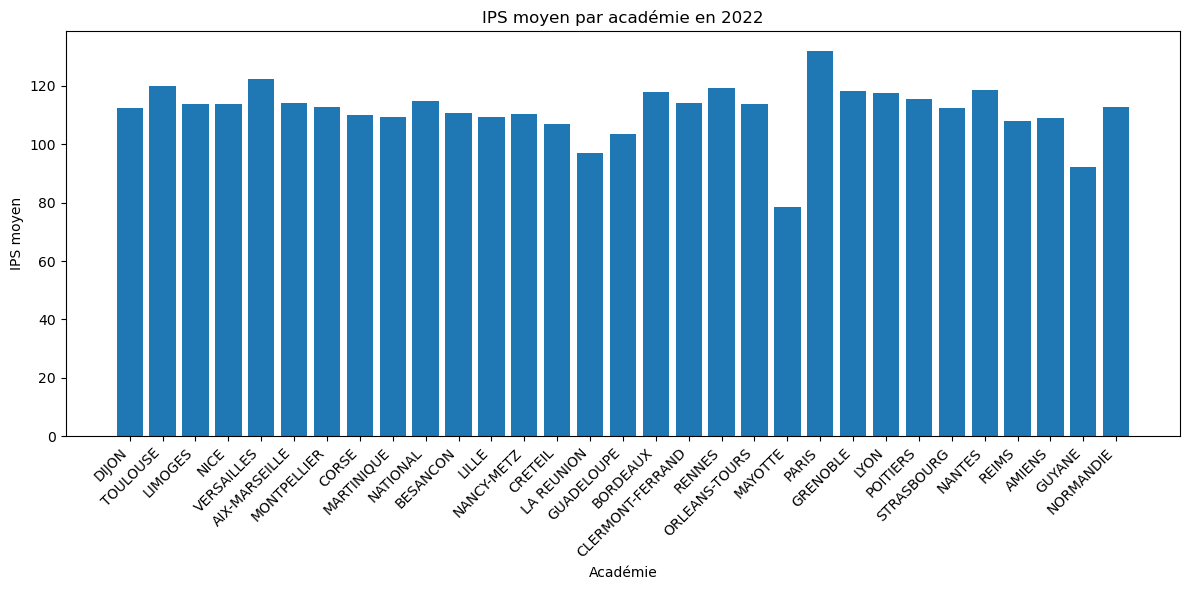

In [37]:
dashboard_2022 = resultat[resultat["Année"] == 2022].copy()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(dashboard_2022["Nom académie"], dashboard_2022["IPS moyen"])

plt.title("IPS moyen par académie en 2022")
plt.xlabel("Académie")
plt.ylabel("IPS moyen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


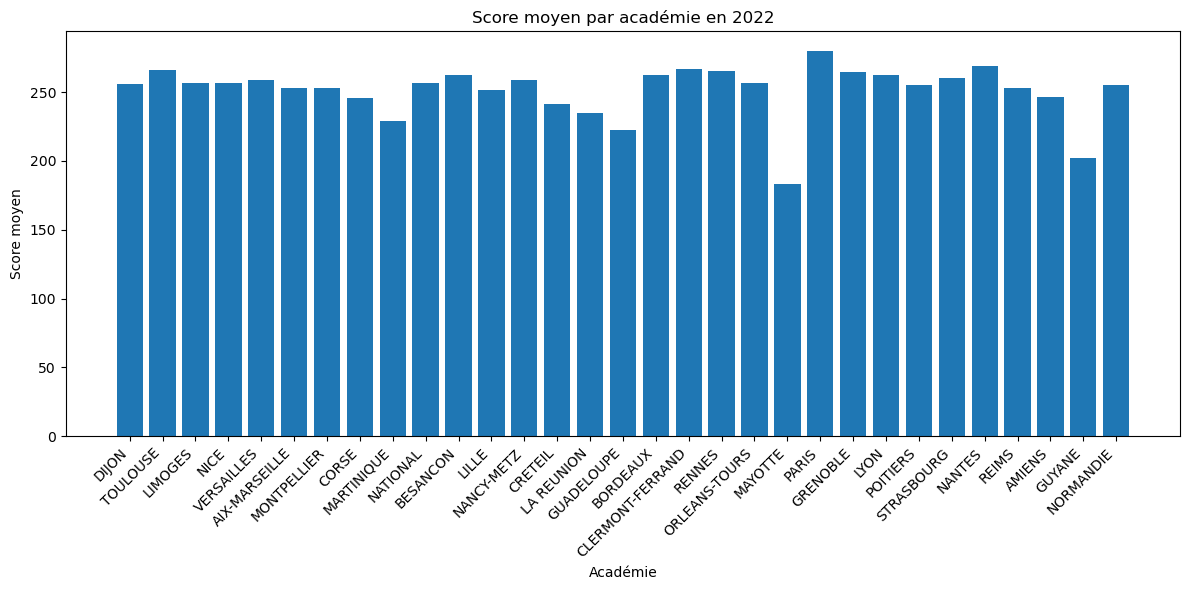

In [39]:
plt.figure(figsize=(12, 6))
plt.bar(dashboard_2022["Nom académie"], dashboard_2022["Score moyen"])

plt.title("Score moyen par académie en 2022")
plt.xlabel("Académie")
plt.ylabel("Score moyen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [41]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(resultat["IPS moyen"], resultat["Score moyen"])
print(f"Corrélation Spearman: {corr}, p-value: {p_value}")


Corrélation Spearman: 0.8255503838129175, p-value: 1.3582714705063384e-47


In [5]:
dashboard_2023 = resultat[resultat["Année"] == 2023].copy()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(dashboard_2023["Nom académie"], dashboard_2023["IPS moyen"])

plt.title("IPS moyen par académie en 2023")
plt.xlabel("Académie")
plt.ylabel("IPS moyen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(dashboard_2023["Nom académie"], dashboard_2023["Score moyen"])

plt.title("Score moyen par académie en 2023")
plt.xlabel("Académie")
plt.ylabel("Score moyen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

NameError: name 'resultat' is not defined

In [55]:
resultat["Code académie"].unique()

array([ 2.,  3., 13., 33.,  4.,  7., 10., 11., 14., 16., 19., 31., 32.,
        6., 15., 18., 23., 27., 28., 22., 25., 20., 43., nan, 12., 24.,
       70.,  1.,  8.,  9., 17.])